# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
df = pd.read_csv('Train.csv') ##  Complete the code to read the data
df_test = pd.read_csv('Test.csv') ##  Complete the code to read the data

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the training data
df.shape ##  Complete the code to view dimensions of the train data

(20000, 41)

<IPython.core.display.Javascript object>

In [4]:
# Checking the number of rows and columns in the test data
df_test.shape ##  Complete the code to view dimensions of the test data

(5000, 41)

<IPython.core.display.Javascript object>

## Data Overview

In [5]:
# let's create a copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

In [6]:
# let's create a copy of the training data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

In [7]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0.646 -1.191  3.133  0.665 -2.511 -0.037  0.726 -3.982 -1.073   
1 -3.065  1.597 -1.757  1.766 -0.267  3.625  1.500 -0.586  0.783 -0.201   
2 -2.143  1.650 -1.661  1.680 -0.451 -4.551  3.739  1.134 -2.034  0.841   
3 -3.517 -1.206 -5.628 -1.818  2.124  5.295  4.748 -2.309 -3.963 -6.029   
4 -0.887  2.062  9.446  4.490 -3.945  4.582 -8.780 -3.383  5.107  6.788   

     V31    V32    V33     V34   V35    V36    V37    V38    V39    V40  \
0  1.667  3.060 -1.690   2.846 2.235  6.667  0.444 -2.369  2.951 -3.480   
1  0.025 -1.795  3.033  -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616   
2 -1.600 -0.257  0.804   4.086 2.292  5.361  0.352  2.940  3.839 -4.309   
3  4.949 -3.584 -2.577   1.364 0.623  5.550 -1.527  0.139  3.101 -1.277   
4  2.044  8.266  6.629 -10.069 1.223 -3.230  1.687 -2.164 -3.645  6.510   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0

<IPython.core.display.Javascript object>

In [8]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data  

V1      V2     V3     V4     V5     V6     V7     V8     V9    V10  \
19995 -2.071  -1.088 -0.796 -3.012 -2.288  2.807  0.481  0.105 -0.587 -2.899   
19996  2.890   2.483  5.644  0.937 -1.381  0.412 -1.593 -5.762  2.150  0.272   
19997 -3.897  -3.942 -0.351 -2.417  1.108 -1.528 -3.520  2.055 -0.234 -0.358   
19998 -3.187 -10.052  5.696 -4.370 -5.355 -1.873 -3.947  0.679 -2.389  5.457   
19999 -2.687   1.961  6.137  2.600  2.657 -4.291 -2.344  0.974 -1.027  0.497   

         V11    V12   V13    V14    V15     V16    V17    V18    V19    V20  \
19995  8.868  1.717 1.358 -1.777  0.710   4.945 -3.100 -1.199 -1.085 -0.365   
19996 -2.095 -1.526 0.072 -3.540 -2.762 -10.632 -0.495  1.720  3.872 -1.210   
19997 -3.782  2.180 6.112  1.985 -8.330  -1.639 -0.915  5.672 -3.924  2.133   
19998  1.583  3.571 9.227  2.554 -7.039  -0.994 -9.665  1.155  3.877  3.524   
19999 -9.589  3.177 1.055 -1.416 -4.669  -5.405  3.720  2.893  2.329  1.458   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
19995  3.131 -3.948 -3.578 -8.139 -1.937 -1.328 -0.403 -1.735  9.996  6.955   
19996 -8.222  2.121 -5.492  1.452  1.450  3.685  1.077 -0.384 -0.839 -0.748   
19997 -4.502  2.777  5.728  1.620 -1.700 -0.042 -2.923 -2.760 -2.254  2.552   
19998 -7.015 -0.132 -3.446 -4.801 -0.876 -3.812  5.422 -3.732  0.609  5.256   
19999 -6.429  1.818  0.806  7.786  0.331  5.257 -4.867 -0.819 -5.667 -2.861   

         V31    V32    V33    V34    V35    V36    V37    V38   V39    V40  \
19995 -3.938 -8.274  5.745  0.589 -0.650 -3.043  2.216  0.609 0.178  2.928   
19996 -1.089 -4.159  1.181 -0.742  5.369 -0.693 -1.669  3.660 0.820 -1.987   
19997  0.982  7.112  1.476 -3.954  1.856  5.029  2.083 -6.409 1.477 -0.874   
19998  1.915  0.403  3.164  3.752  8.530  8.451  0.204 -7.130 4.249 -6.112   
19999  4.674  6.621 -1.989 -1.349  3.952  5.450 -0.455 -2.202 1.678 -1.974   

       Target  
19995       1  
19996       0  
19997       0  
19998       0  
19999       0

<IPython.core.display.Javascript object>

In [9]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [10]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

<IPython.core.display.Javascript object>

In [11]:
# let's check for missing values in the data
data.isna().sum()##  Complete the code to check missing entries in the train data

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# let's check for missing values in the data
data_test.isna().sum() ##  Complete the code to check missing entries in the test data

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

count   mean   std     min    25%    50%    75%    max
V1     19982.000 -0.272 3.442 -11.876 -2.737 -0.748  1.840 15.493
V2     19982.000  0.440 3.151 -12.320 -1.641  0.472  2.544 13.089
V3     20000.000  2.485 3.389 -10.708  0.207  2.256  4.566 17.091
V4     20000.000 -0.083 3.432 -15.082 -2.348 -0.135  2.131 13.236
V5     20000.000 -0.054 2.105  -8.603 -1.536 -0.102  1.340  8.134
V6     20000.000 -0.995 2.041 -10.227 -2.347 -1.001  0.380  6.976
V7     20000.000 -0.879 1.762  -7.950 -2.031 -0.917  0.224  8.006
V8     20000.000 -0.548 3.296 -15.658 -2.643 -0.389  1.723 11.679
V9     20000.000 -0.017 2.161  -8.596 -1.495 -0.068  1.409  8.138
V10    20000.000 -0.013 2.193  -9.854 -1.411  0.101  1.477  8.108
V11    20000.000 -1.895 3.124 -14.832 -3.922 -1.921  0.119 11.826
V12    20000.000  1.605 2.930 -12.948 -0.397  1.508  3.571 15.081
V13    20000.000  1.580 2.875 -13.228 -0.224  1.637  3.460 15.420
V14    20000.000 -0.951 1.790  -7.739 -2.171 -0.957  0.271  5.671
V15    20000.000 -2.415 3.355 -16.417 -4.415 -2.383 -0.359 12.246
V16    20000.000 -2.925 4.222 -20.374 -5.634 -2.683 -0.095 13.583
V17    20000.000 -0.134 3.345 -14.091 -2.216 -0.015  2.069 16.756
V18    20000.000  1.189 2.592 -11.644 -0.404  0.883  2.572 13.180
V19    20000.000  1.182 3.397 -13.492 -1.050  1.279  3.493 13.238
V20    20000.000  0.024 3.669 -13.923 -2.433  0.033  2.512 16.052
V21    20000.000 -3.611 3.568 -17.956 -5.930 -3.533 -1.266 13.840
V22    20000.000  0.952 1.652 -10.122 -0.118  0.975  2.026  7.410
V23    20000.000 -0.366 4.032 -14.866 -3.099 -0.262  2.452 14.459
V24    20000.000  1.134 3.912 -16.387 -1.468  0.969  3.546 17.163
V25    20000.000 -0.002 2.017  -8.228 -1.365  0.025  1.397  8.223
V26    20000.000  1.874 3.435 -11.834 -0.338  1.951  4.130 16.836
V27    20000.000 -0.612 4.369 -14.905 -3.652 -0.885  2.189 17.560
V28    20000.000 -0.883 1.918  -9.269 -2.171 -0.891  0.376  6.528
V29    20000.000 -0.986 2.684 -12.579 -2.787 -1.176  0.630 10.722
V30    20000.000 -0.016 3.005 -14.796 -1.867  0.184  2.036 12.506
V31    20000.000  0.487 3.461 -13.723 -1.818  0.490  2.731 17.255
V32    20000.000  0.304 5.500 -19.877 -3.420  0.052  3.762 23.633
V33    20000.000  0.050 3.575 -16.898 -2.243 -0.066  2.255 16.692
V34    20000.000 -0.463 3.184 -17.985 -2.137 -0.255  1.437 14.358
V35    20000.000  2.230 2.937 -15.350  0.336  2.099  4.064 15.291
V36    20000.000  1.515 3.801 -14.833 -0.944  1.567  3.984 19.330
V37    20000.000  0.011 1.788  -5.478 -1.256 -0.128  1.176  7.467
V38    20000.000 -0.344 3.948 -17.375 -2.988 -0.317  2.279 15.290
V39    20000.000  0.891 1.753  -6.439 -0.272  0.919  2.058  7.760
V40    20000.000 -0.876 3.012 -11.024 -2.940 -0.921  1.120 10.654
Target 20000.000  0.056 0.229   0.000  0.000  0.000  0.000  1.000

<IPython.core.display.Javascript object>

## EDA

In [14]:
data.corr() < -0.8

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
V1      False  False  False  False  False  False  False  False  False  False   
V2      False  False  False  False  False  False  False  False  False  False   
V3      False  False  False  False  False  False  False  False  False  False   
V4      False  False  False  False  False  False  False  False  False  False   
V5      False  False  False  False  False  False  False  False  False  False   
V6      False  False  False  False  False  False  False  False  False  False   
V7      False  False  False  False  False  False  False  False  False  False   
V8      False  False  False  False  False  False  False  False  False  False   
V9      False  False  False  False  False  False  False  False  False  False   
V10     False  False  False  False  False  False  False  False  False  False   
V11     False  False  False  False  False  False  False  False  False  False   
V12     False  False  False  False  False  False  False  False  False  False   
V13     False  False  False  False  False  False  False  False  False  False   
V14     False   True  False  False  False  False  False  False  False  False   
V15     False  False  False  False  False  False  False  False  False  False   
V16     False  False  False  False  False  False  False  False  False  False   
V17     False  False  False  False  False  False  False  False  False  False   
V18     False  False  False  False  False  False  False  False  False  False   
V19     False  False  False  False  False  False  False  False  False  False   
V20     False  False  False  False  False  False  False  False  False  False   
V21     False  False  False  False  False  False  False  False  False  False   
V22     False  False  False  False  False  False  False  False  False  False   
V23     False  False  False  False  False  False  False  False  False  False   
V24     False  False  False  False  False  False  False  False  False  False   
V25     False  False  False  False  False  False  False  False  False  False   
V26     False  False  False  False  False  False  False  False  False  False   
V27     False  False  False  False  False  False  False  False  False  False   
V28     False  False  False  False  False  False  False  False  False  False   
V29     False  False  False  False  False  False  False  False  False  False   
V30     False  False  False  False  False  False  False  False  False  False   
V31     False  False  False  False  False  False  False  False  False  False   
V32     False  False  False  False  False  False  False  False  False  False   
V33     False  False  False  False  False  False  False  False  False  False   
V34     False  False  False  False  False  False  False  False  False  False   
V35     False  False  False  False  False  False  False  False  False  False   
V36     False  False  False  False  False  False  False  False  False  False   
V37     False  False  False  False  False  False  False  False  False  False   
V38     False  False  False  False  False  False  False  False  False  False   
V39     False  False  False  False  False  False  False  False  False  False   
V40     False  False  False  False  False  False  False  False  False  False   
Target  False  False  False  False  False  False  False  False  False  False   

          V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
V1      False  False  False  False  False  False  False  False  False  False   
V2      False  False  False   True  False  False  False  False  False  False   
V3      False  False  False  False  False  False  False  False  False  False   
V4      False  False  False  False  False  False  False  False  False  False   
V5      False  False  False  False  False  False  False  False  False  False   
V6      False  False  False  False  False  False  False  False  False  False   
V7      False  False  False  False  False  False  False  False  False  False   
V8      Fa

<IPython.core.display.Javascript object>

### Univariate analysis

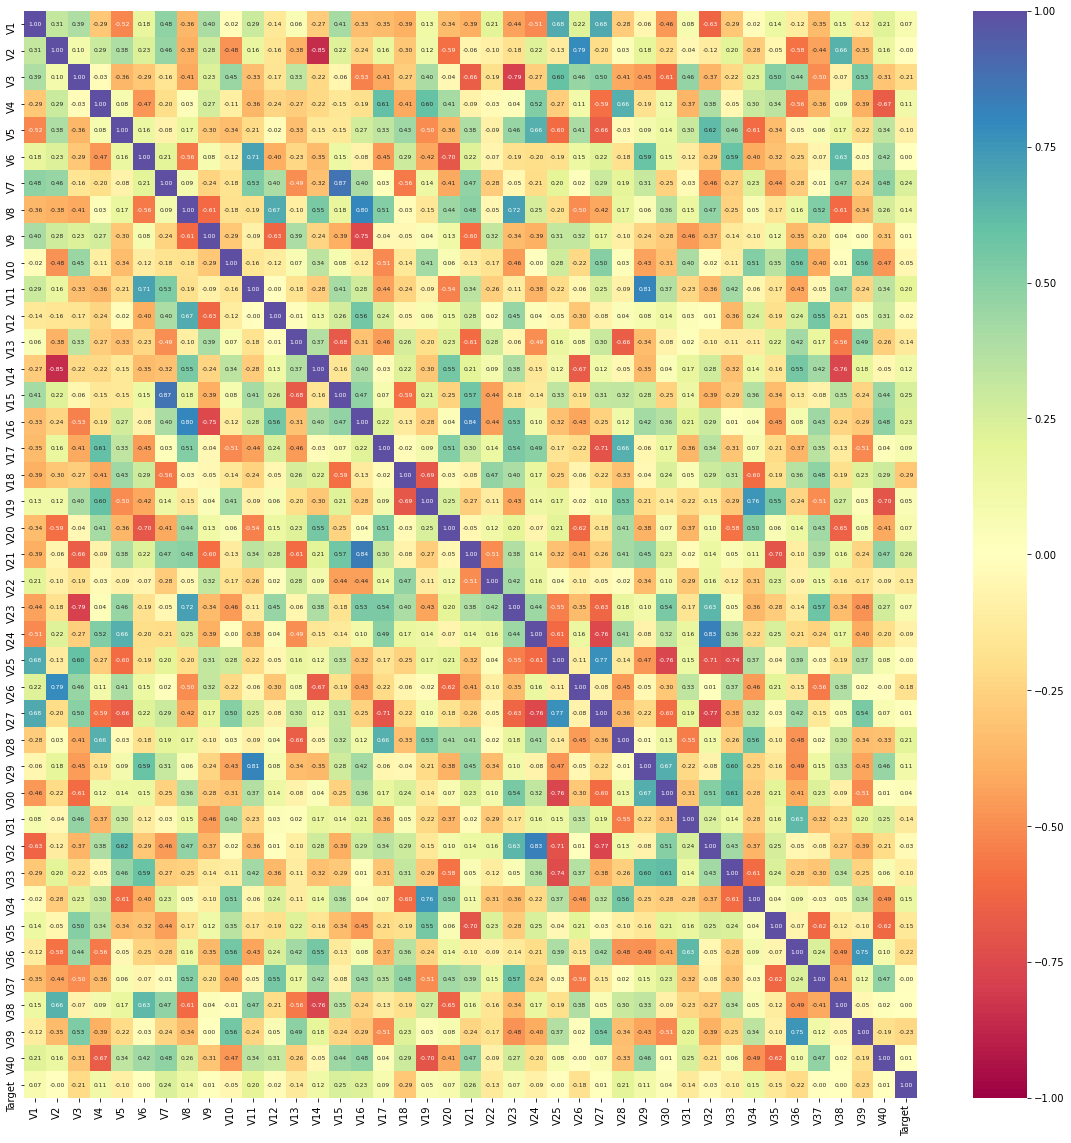

<IPython.core.display.Javascript object>

In [15]:

plt.figure(figsize=(20, 20))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", annot_kws={"fontsize":6}
) ## Complete the code to find the correlation between the variables
plt.show()

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting histograms and boxplots for all the variables

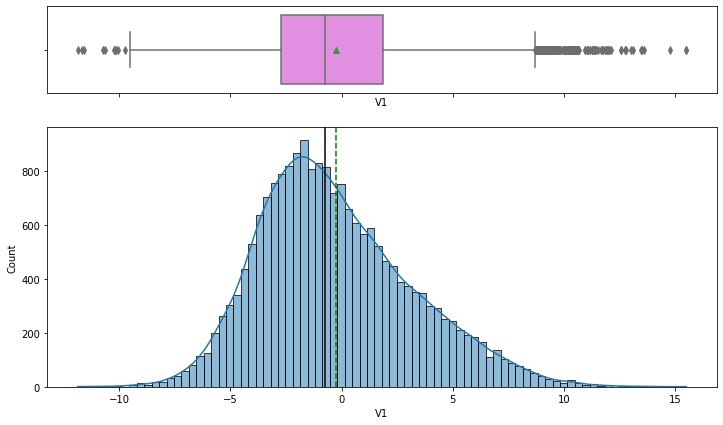

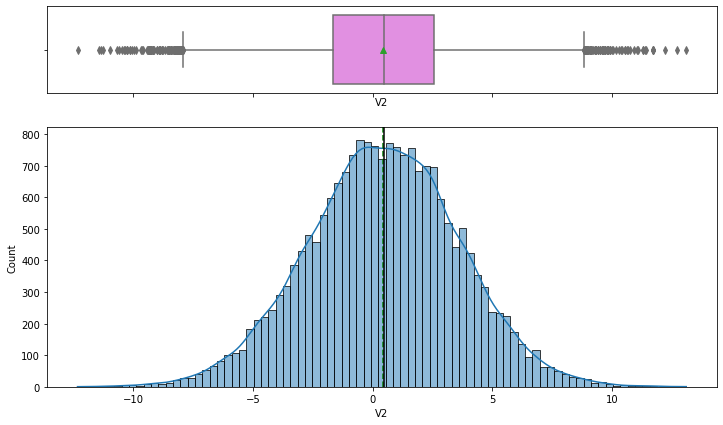

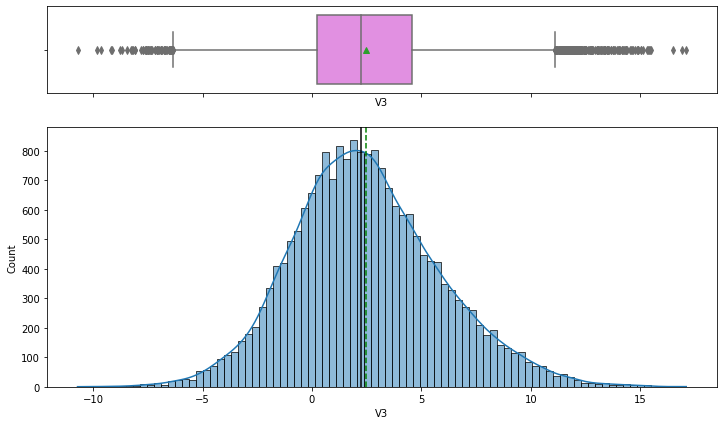

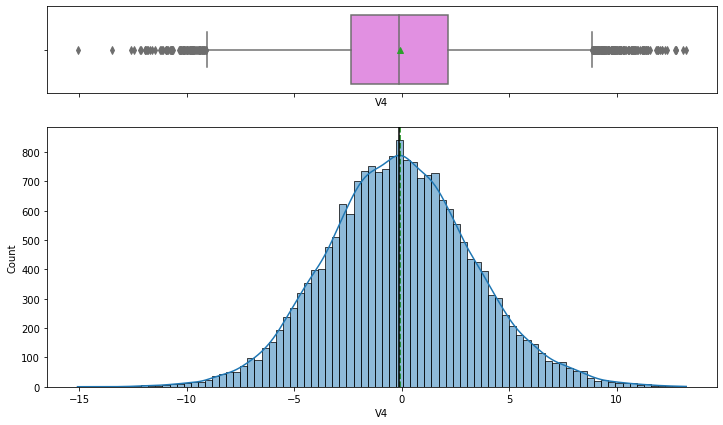

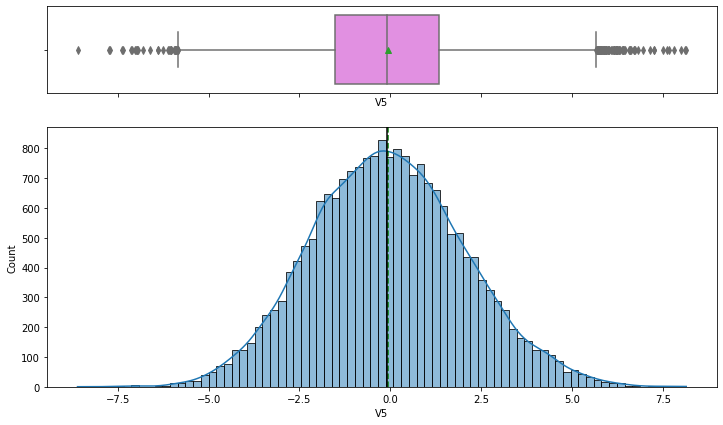

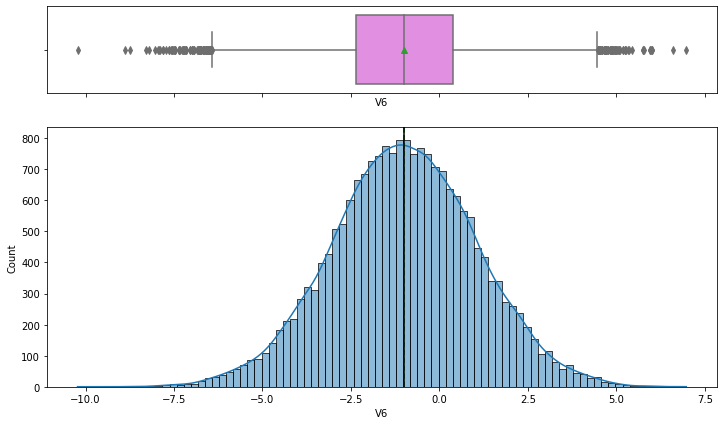

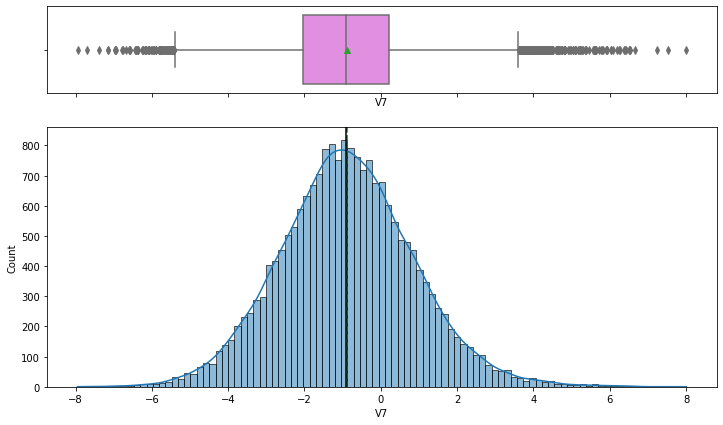

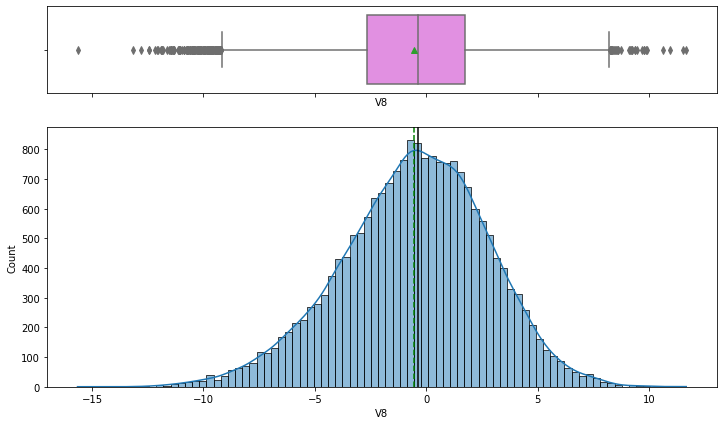

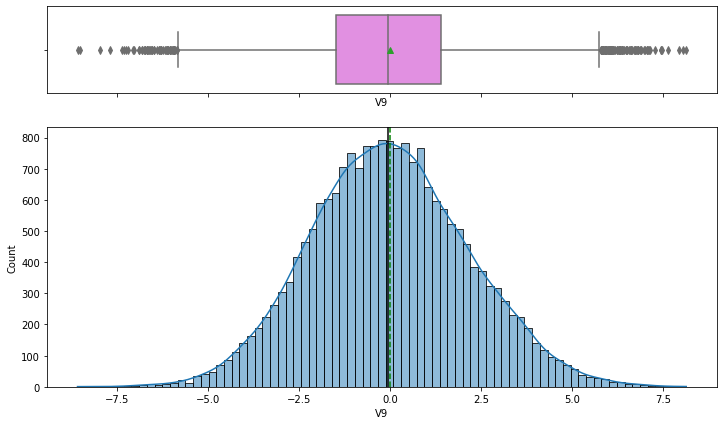

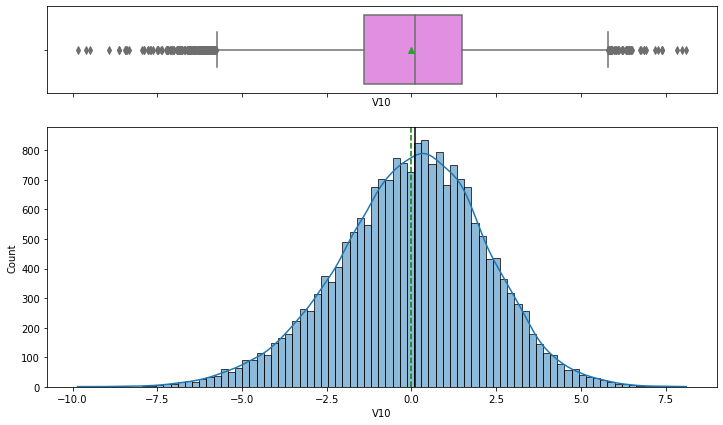

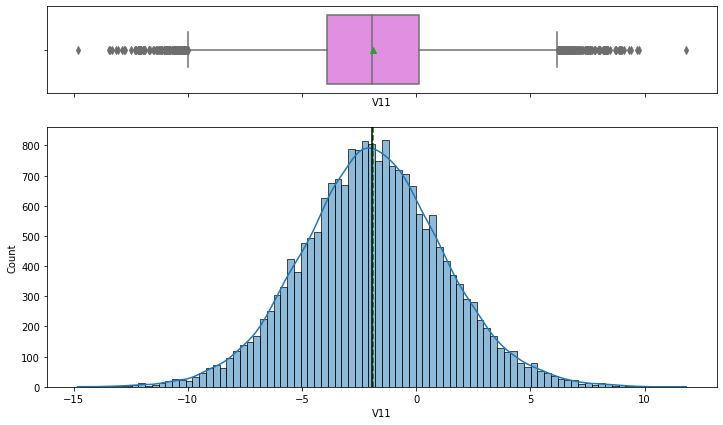

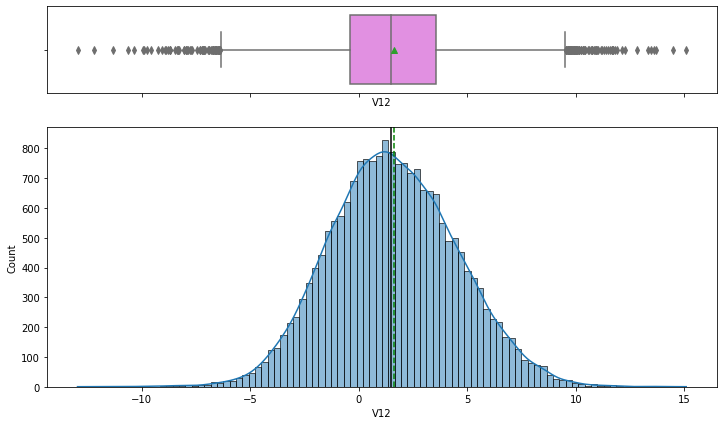

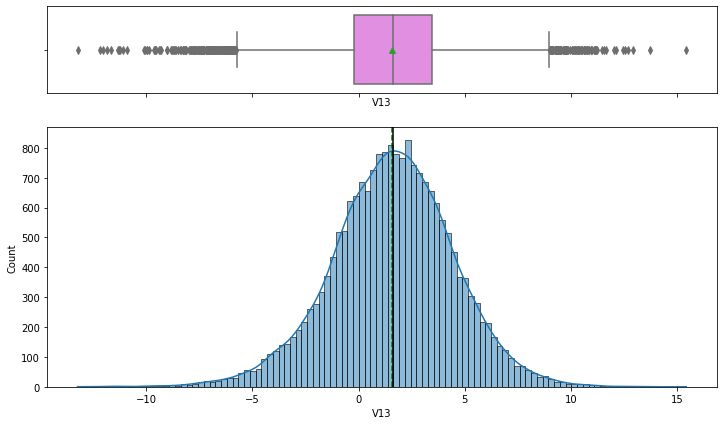

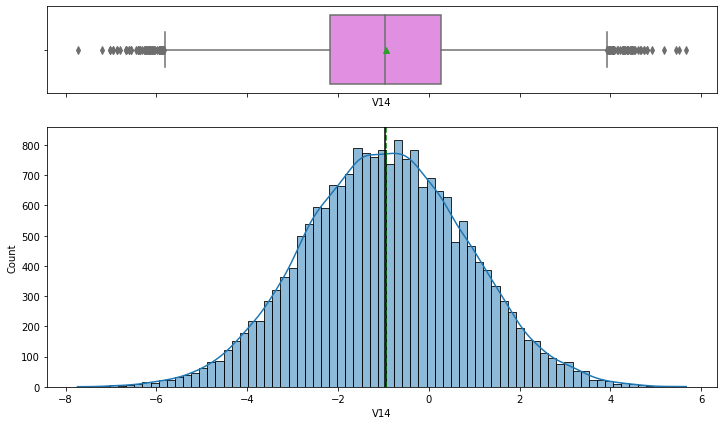

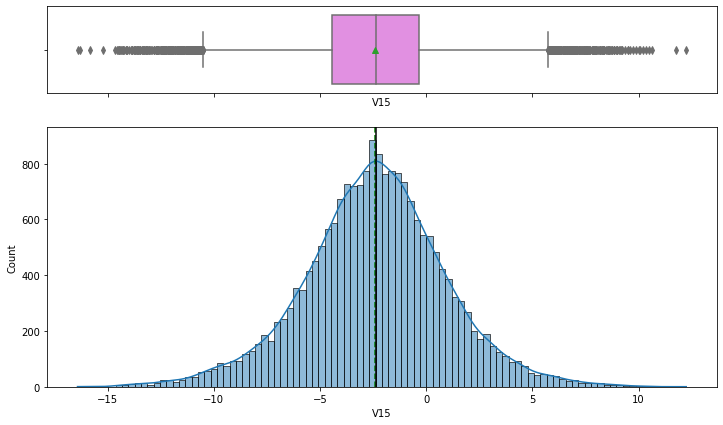

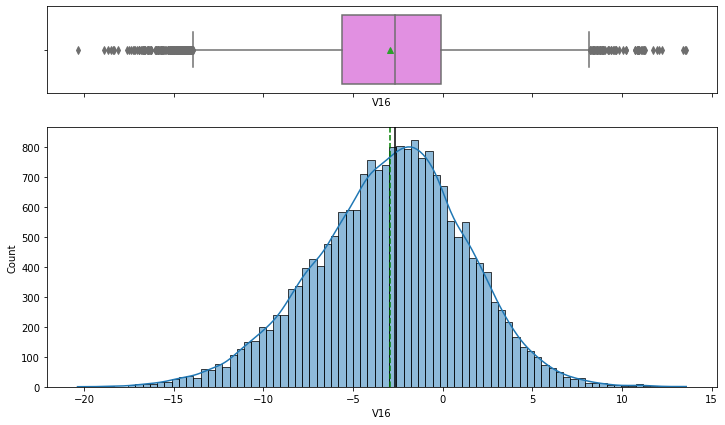

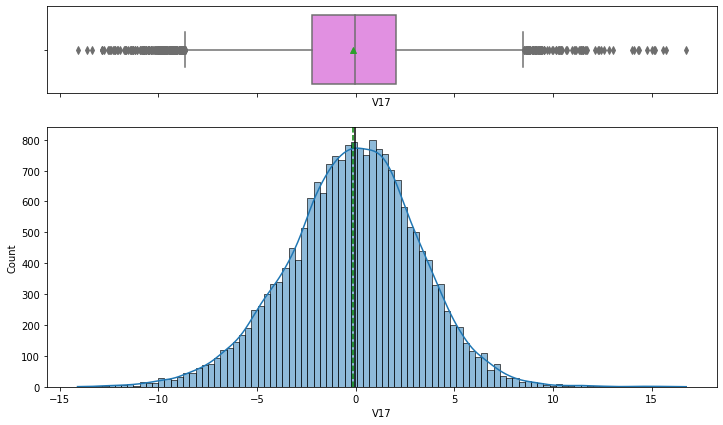

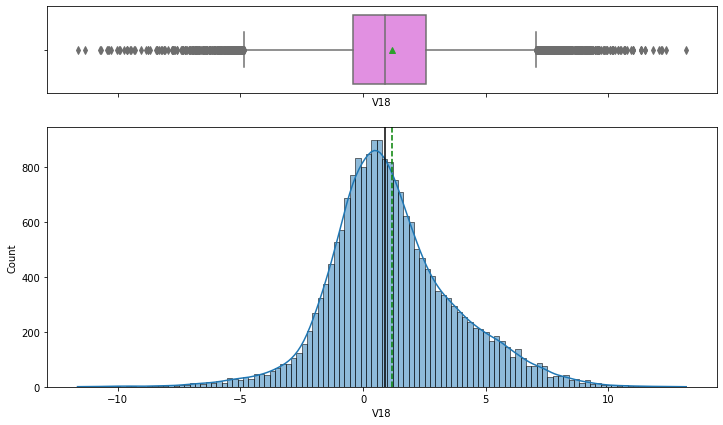

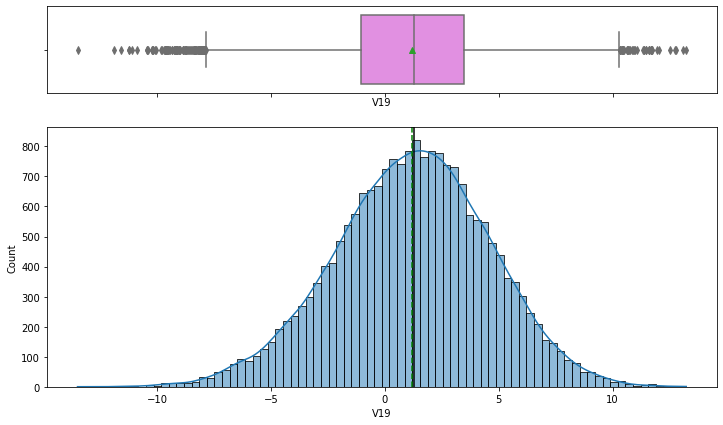

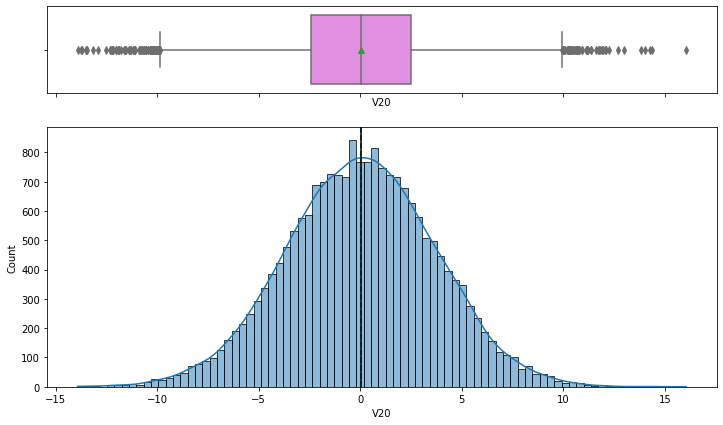

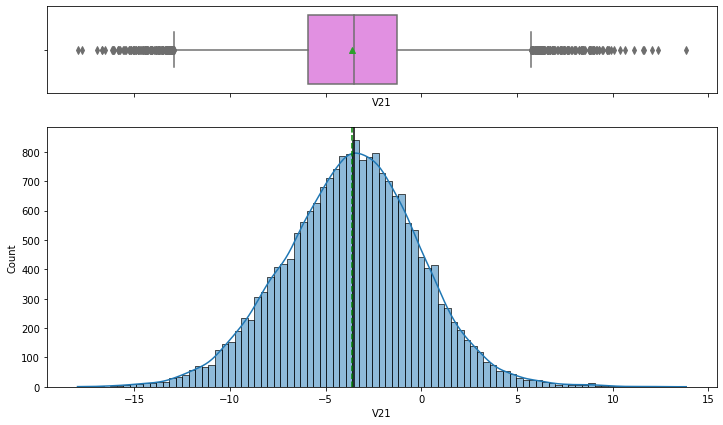

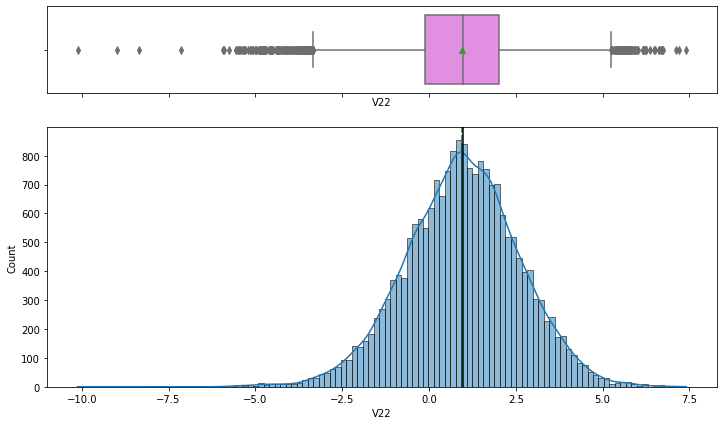

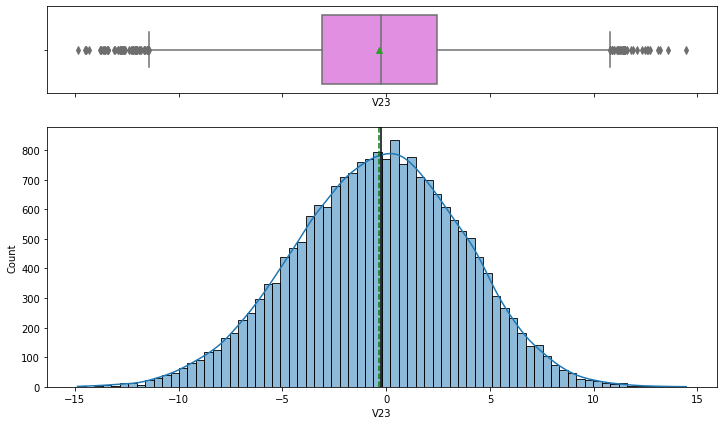

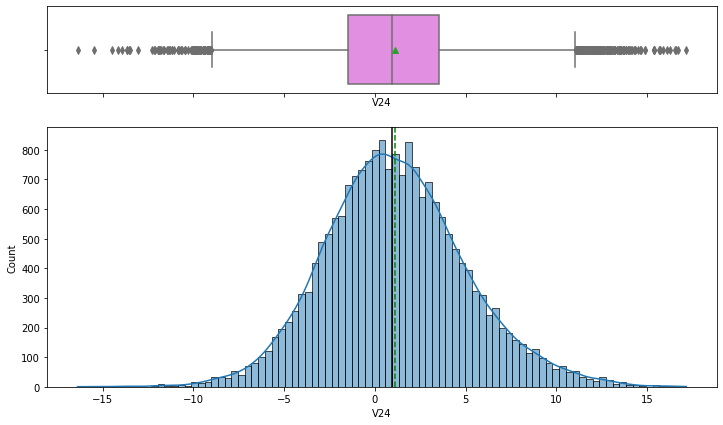

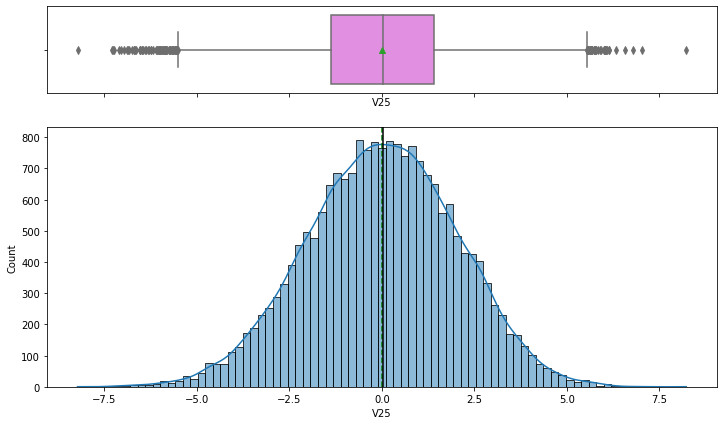

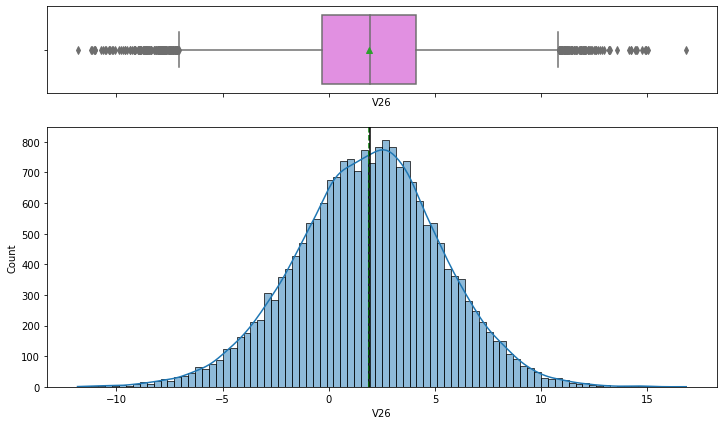

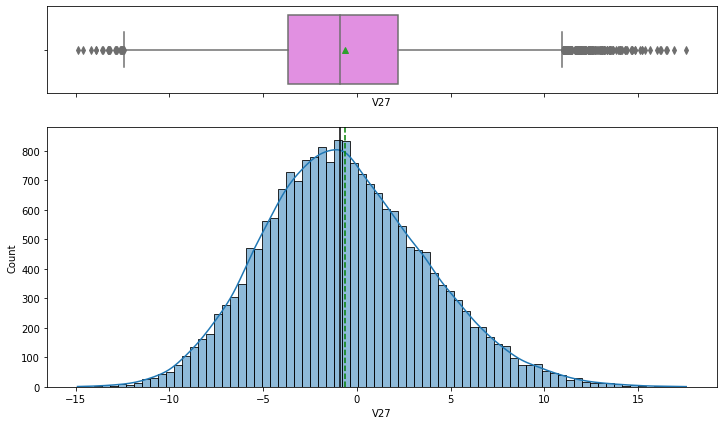

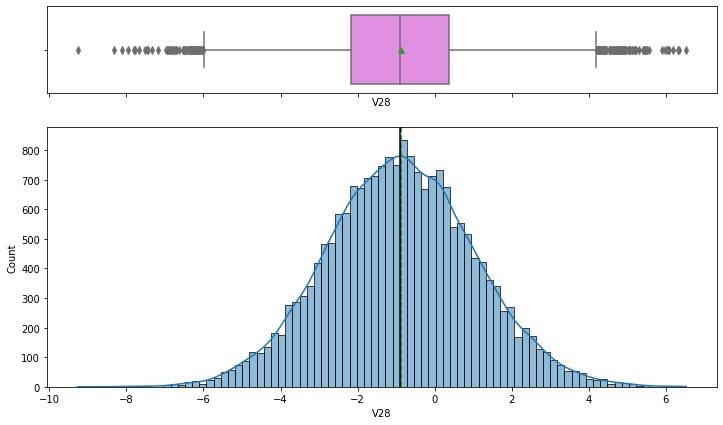

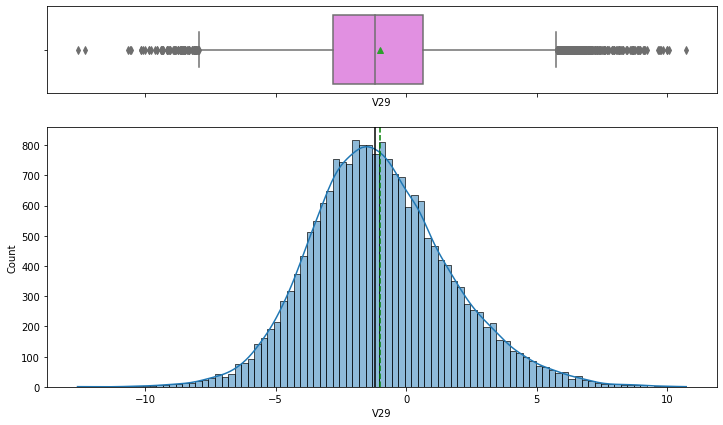

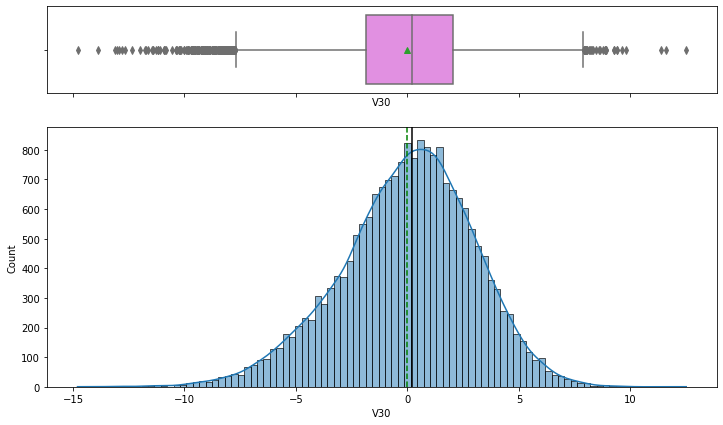

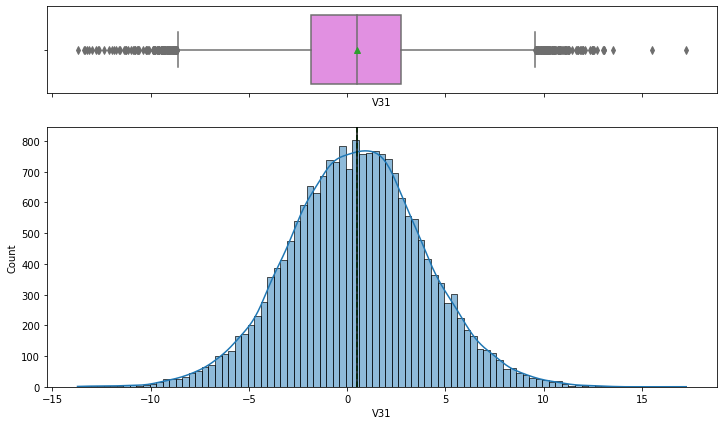

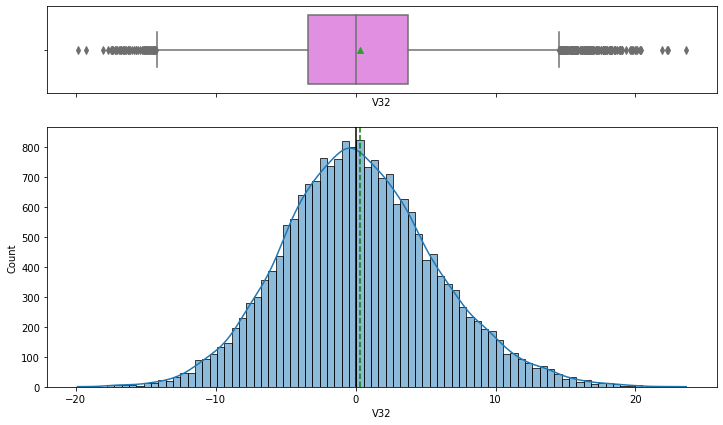

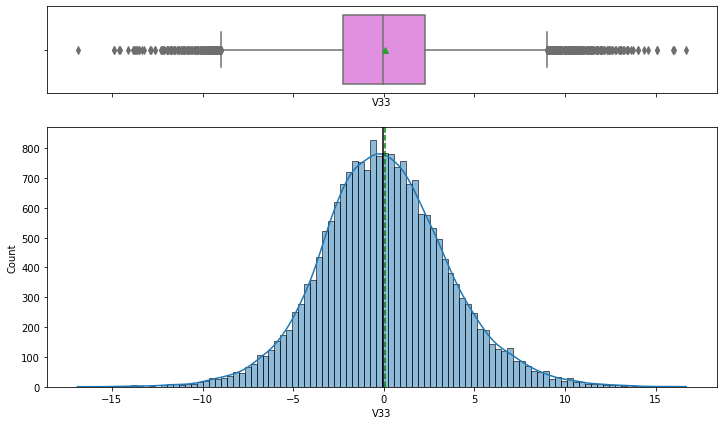

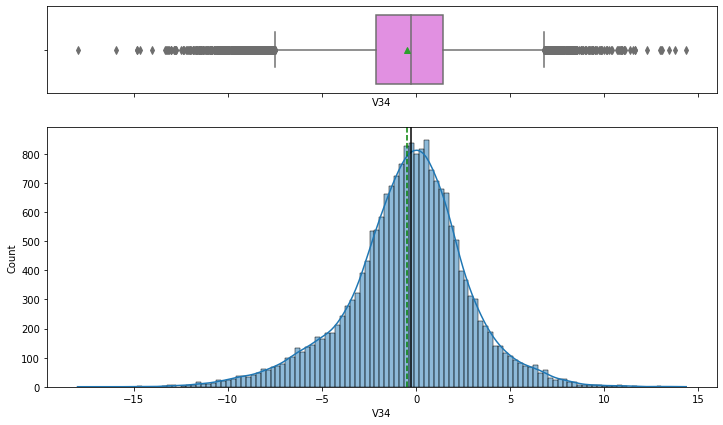

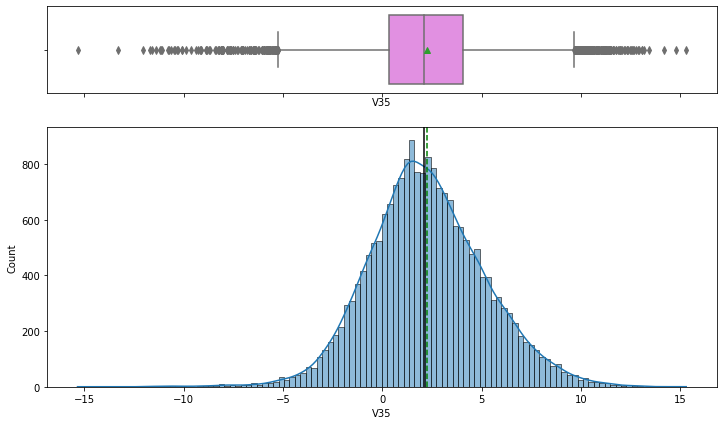

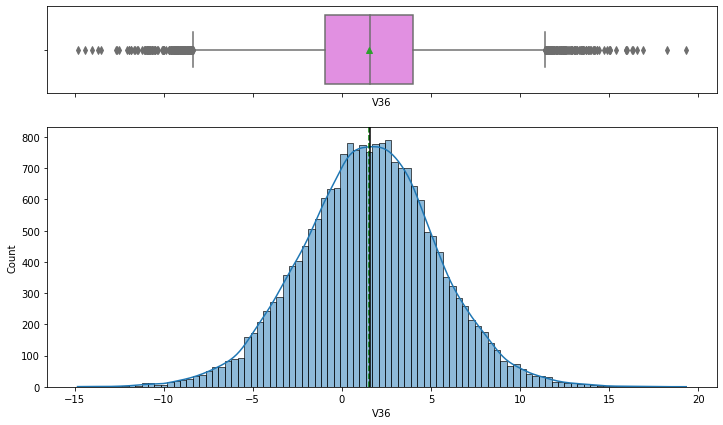

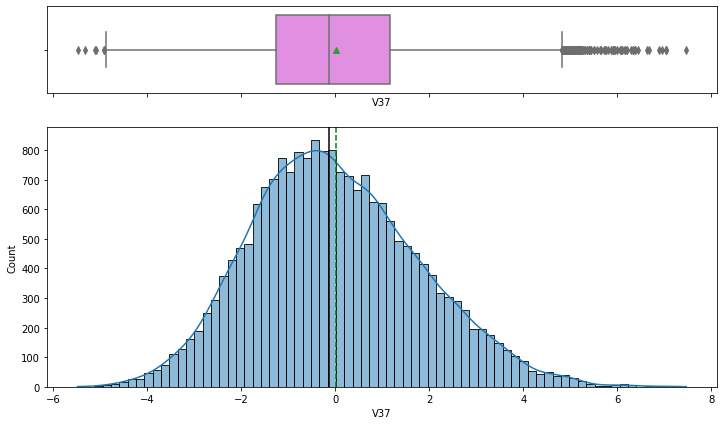

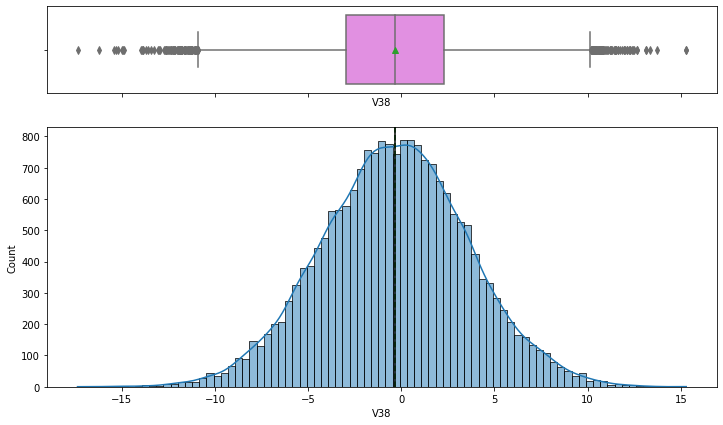

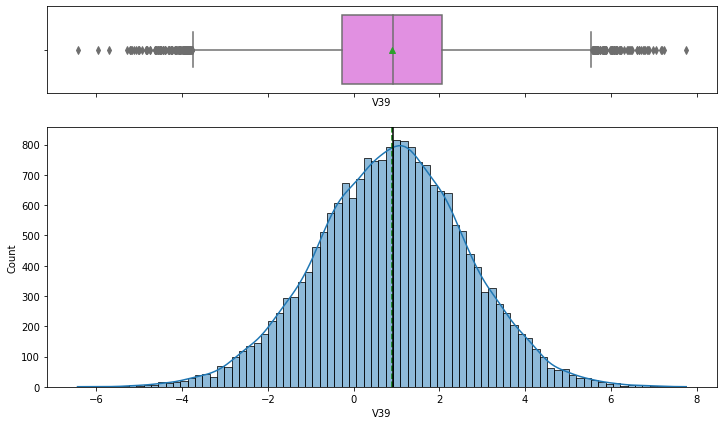

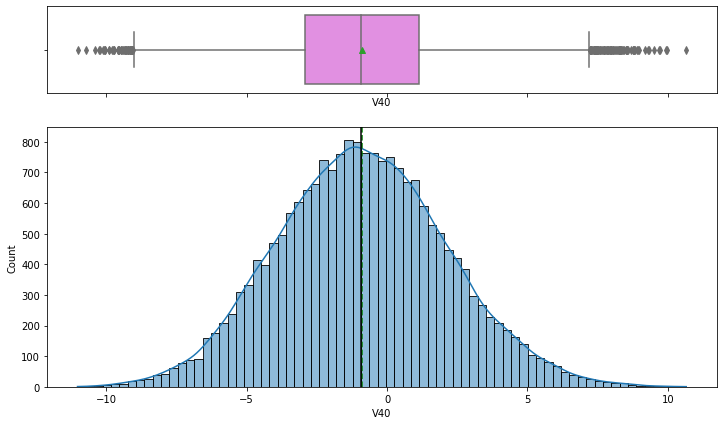

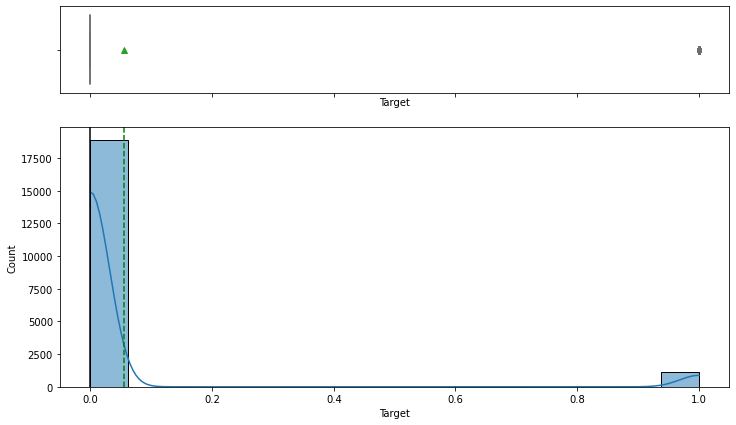

<IPython.core.display.Javascript object>

In [17]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None)

### Let's look at the values in target variable

In [18]:
print(data["Target"].value_counts()) ##  Complete the code to check the class distribution in target variable for train data
print(data["Target"].value_counts() / data.shape[0] * 100) 

0    18890
1     1110
Name: Target, dtype: int64
0   94.450
1    5.550
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

In [19]:
print(data_test["Target"].value_counts()) ##  Complete the code to check the class distribution in target variable for test data
print(data_test["Target"].value_counts() / data_test.shape[0] * 100)

0    4718
1     282
Name: Target, dtype: int64
0   94.360
1    5.640
Name: Target, dtype: float64


<IPython.core.display.Javascript object>

## Data Pre-Processing

In [20]:
# Dividing data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

X_test = data_test.drop('Target', axis=1) ##  Complete the code to drop target variable from test data
y_test = data_test['Target'] ##  Complete the code to store target variable in y_test

<IPython.core.display.Javascript object>

In [21]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25, random_state=1) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


<IPython.core.display.Javascript object>

In [22]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [23]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val =  pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns) ## Complete the code to impute missing values in X_test

<IPython.core.display.Javascript object>

In [24]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum().sum())
print("-" * 30)

print(X_val.isna().sum().sum()) ## Complete the code to check the count of missing values in validation set
print("-" * 30)
print(X_test.isna().sum().sum()) ## Complete the code to check the count of missing values in test set

0
------------------------------
0
------------------------------
0


<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [26]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [27]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

In [28]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
## Complete the code to append remaining 4 models in the list models
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Ada boost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient boost", GradientBoostingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(eval_metric='logloss', random_state=1)))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.5144578313253012
Bagging: 0.7163696702979583
Decision Tree: 0.7139600317437415
Ada boost: 0.5938027559339153
Gradient boost: 0.7007070196955487
Random forest: 0.7259577231080009
XGB: 0.8041050429261958

Validation Performance:

Logistic regression: 0.420863309352518
Bagging: 0.6870503597122302
Decision Tree: 0.697841726618705
Ada boost: 0.5251798561151079
Gradient boost: 0.6654676258992805
Random forest: 0.6906474820143885
XGB: 0.762589928057554


<IPython.core.display.Javascript object>

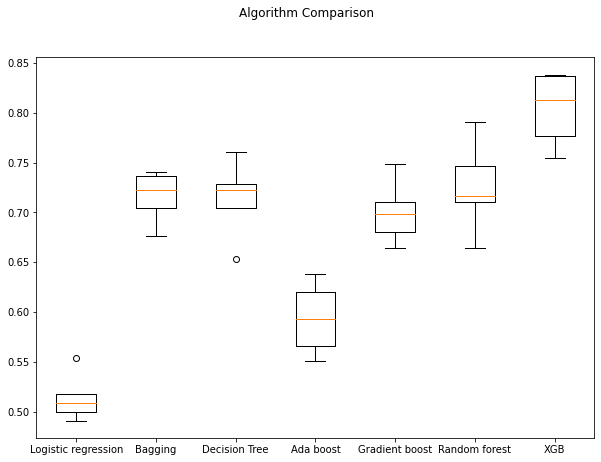

<IPython.core.display.Javascript object>

In [29]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 832
Before OverSampling, counts of label '0': 14168 

After OverSampling, counts of label '1': 14168
After OverSampling, counts of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



<IPython.core.display.Javascript object>

In [31]:
## Complete the code to build models on oversampled data 
## Note - Take reference from the original models built above

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost After Oversampling:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance After Oversampling:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost After Oversampling:

Logistic regression: 0.8785997074005053
Bagging: 0.97826082407636
Decision Tree: 0.9692265593453107
Ada boost: 0.9013965360863161
Gradient boost: 0.9252540566232085
Random forest: 0.9841897377938856
XGB: 0.9908950639964867

Validation Performance After Oversampling:

Logistic regression: 0.8381294964028777
Bagging: 0.802158273381295
Decision Tree: 0.7769784172661871
Ada boost: 0.8237410071942446
Gradient boost: 0.8776978417266187
Random forest: 0.8201438848920863
XGB: 0.8705035971223022


<IPython.core.display.Javascript object>

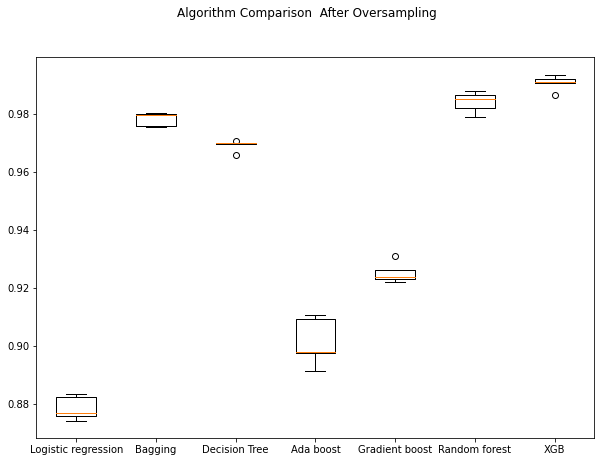

<IPython.core.display.Javascript object>

In [32]:
# Plotting boxplots for CV scores of all models defined above
## Write the code to create boxplot to check model performance on oversampled data

fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison  After Oversampling")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with undersampled data

In [33]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



<IPython.core.display.Javascript object>

In [34]:
## Complete the code to build models on undersampled data 
## Note - Take reference from the original models built above

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost After Undersampling:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance After Undersampling:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost After Undersampling:

Logistic regression: 0.8594617992929804
Bagging: 0.8642522184546569
Decision Tree: 0.8557751965947624
Ada boost: 0.8690282086429552
Gradient boost: 0.8954837313325157
Random forest: 0.8966957650963133
XGB: 0.8942572685953394

Validation Performance After Undersampling:

Logistic regression: 0.8453237410071942
Bagging: 0.8633093525179856
Decision Tree: 0.8273381294964028
Ada boost: 0.8669064748201439
Gradient boost: 0.8812949640287769
Random forest: 0.8812949640287769
XGB: 0.8848920863309353


<IPython.core.display.Javascript object>

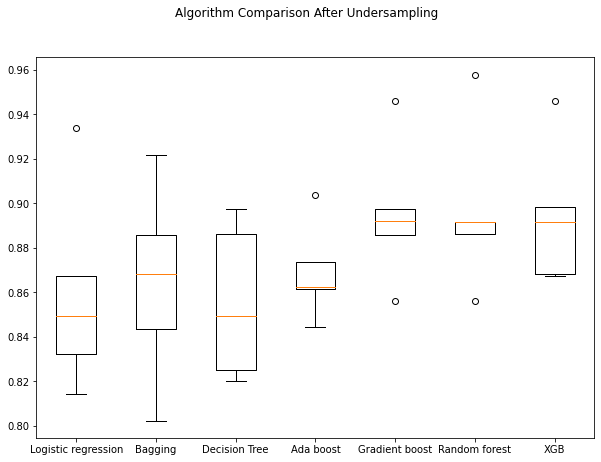

<IPython.core.display.Javascript object>

In [35]:
# Plotting boxplots for CV scores of all models defined above
## Write the code to create boxplot to check model performance on undersampled data

fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison After Undersampling")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [36]:
%%time 

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9728265594449528:
Wall time: 9min 19s


<IPython.core.display.Javascript object>

In [37]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators= 200, learning_rate= 0.2, base_estimator= DecisionTreeClassifier(max_depth = 3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

<IPython.core.display.Javascript object>

In [38]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

Accuracy  Recall  Precision    F1
0     0.992   0.989      0.996 0.992

<IPython.core.display.Javascript object>

In [39]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val) ## Complete the code to check the performance on validation set
ada_val_perf

Accuracy  Recall  Precision    F1
0     0.982   0.842      0.842 0.842

<IPython.core.display.Javascript object>

### Tuning Random forest using undersampled data

In [40]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9002669360075032:
Wall time: 18.4 s


<IPython.core.display.Javascript object>

In [41]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=300,
    min_samples_leaf=1,
)## Complete the code with the best parameters obtained from tuning

tuned_rf2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

<IPython.core.display.Javascript object>

In [42]:
rf2_train_perf = model_performance_classification_sklearn(tuned_rf2, X_train_un, y_train_un) ## Complete the code to check the performance on undersampled train set
rf2_train_perf

Accuracy  Recall  Precision    F1
0     0.986   0.974      0.999 0.986

<IPython.core.display.Javascript object>

In [43]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val) ## Complete the code to check the performance on validation set
rf2_val_perf

Accuracy  Recall  Precision    F1
0     0.941   0.878      0.483 0.623

<IPython.core.display.Javascript object>

### Tuning Gradient Boosting using oversampled data

In [44]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV score=0.9696511599230861:
Wall time: 4min 9s


<IPython.core.display.Javascript object>

In [45]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7,
) ## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [46]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

Accuracy  Recall  Precision    F1
0     0.995   0.994      0.995 0.995

<IPython.core.display.Javascript object>

In [47]:
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)
gbm_val_perf

Accuracy  Recall  Precision    F1
0     0.968   0.849      0.667 0.747

<IPython.core.display.Javascript object>

### Tuning XGBoost using oversampled data

**Note**: You can choose to skip this section if XGBoost gives error.

In [48]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.996682684990214:
Wall time: 32min 43s


<IPython.core.display.Javascript object>

In [49]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [50]:
xgb2_train_perf =  model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over) ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

Accuracy  Recall  Precision    F1
0     0.998   1.000      0.995 0.998

<IPython.core.display.Javascript object>

In [51]:
xgb2_val_perf =  model_performance_classification_sklearn(
    xgb2, X_val, y_val) ## Complete the code to check the performance on validation set
xgb2_val_perf

Accuracy  Recall  Precision    F1
0     0.977   0.881      0.749 0.810

<IPython.core.display.Javascript object>

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance comparison

In [52]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
        xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data (training)",
    "AdaBoost classifier tuned with oversampled data (training)",
    "Random forest tuned with undersampled data (training)",
    "XGBoost tuned with oversampled data (training)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boosting tuned with oversampled data (training)  \
Accuracy                                               0.995          
Recall                                                 0.994          
Precision                                              0.995          
F1                                                     0.995          

           AdaBoost classifier tuned with oversampled data (training)  \
Accuracy                                               0.992            
Recall                                                 0.989            
Precision                                              0.996            
F1                                                     0.992            

           Random forest tuned with undersampled data (training)  \
Accuracy                                               0.986       
Recall                                                 0.974       
Precision                                              0.999       
F1                                                     0.986       

           XGBoost tuned with oversampled data (training)  
Accuracy                                            0.998  
Recall                                              1.000  
Precision                                           0.995  
F1                                                  0.998

<IPython.core.display.Javascript object>

In [53]:
# validation performance comparison

## Write the code to compare the performance on validation set

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
        xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data (validation)",
    "AdaBoost classifier tuned with oversampled data (validation)",
    "Random forest tuned with undersampled data (validation)",
    "XGBoost tuned with oversampled data (validation)",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient Boosting tuned with oversampled data (validation)  \
Accuracy                                               0.968            
Recall                                                 0.849            
Precision                                              0.667            
F1                                                     0.747            

           AdaBoost classifier tuned with oversampled data (validation)  \
Accuracy                                               0.982              
Recall                                                 0.842              
Precision                                              0.842              
F1                                                     0.842              

           Random forest tuned with undersampled data (validation)  \
Accuracy                                               0.941         
Recall                                                 0.878         
Precision                                              0.483         
F1                                                     0.623         

           XGBoost tuned with oversampled data (validation)  
Accuracy                                              0.977  
Recall                                                0.881  
Precision                                             0.749  
F1                                                    0.810

<IPython.core.display.Javascript object>

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [54]:
# Let's check the performance on test set
ada_test_perf =  model_performance_classification_sklearn(
    tuned_ada, X_test, y_test) ## Complete the code to check the performance on validation set
ada_test_perf ## Write the code to check the performance of best model on test data

Accuracy  Recall  Precision    F1
0     0.981   0.840      0.826 0.833

<IPython.core.display.Javascript object>

In [60]:
xgb = XGBClassifier(eval_metric='logloss', random_state=1)
xgb.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

### Feature Importances

In [61]:
xgb_train_perf =  model_performance_classification_sklearn(
    xgb, X_train_un, y_train_un) ## Complete the code to check the performance on validation set
xgb_train_perf

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

In [62]:
xgb_val_perf =  model_performance_classification_sklearn(
    xgb, X_val, y_val) ## Complete the code to check the performance on validation set
xgb_val_perf

Accuracy  Recall  Precision    F1
0     0.949   0.885      0.526 0.660

<IPython.core.display.Javascript object>

In [63]:
xgb_test_perf =  model_performance_classification_sklearn(
    xgb, X_test, y_test) ## Complete the code to check the performance on validation set
xgb_test_perf

Accuracy  Recall  Precision    F1
0     0.953   0.869      0.554 0.677

<IPython.core.display.Javascript object>

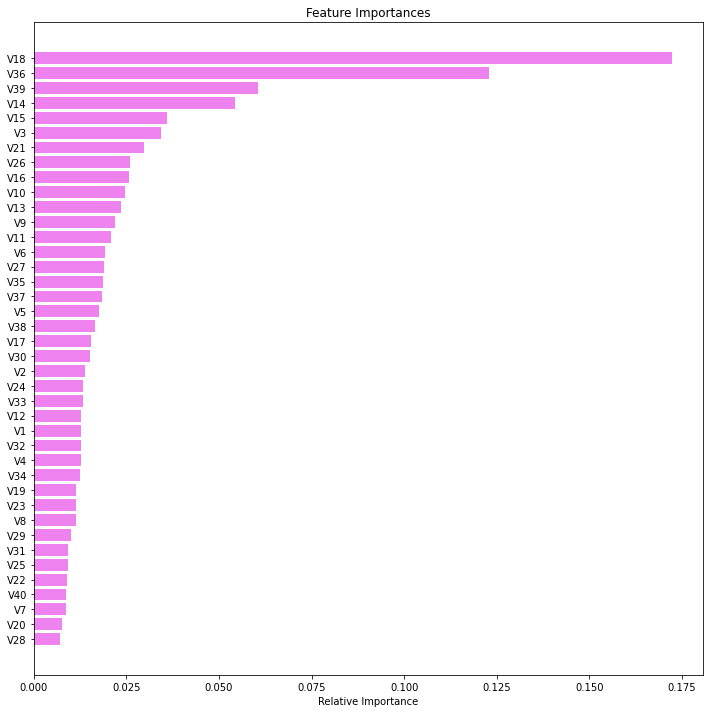

<IPython.core.display.Javascript object>

In [64]:
feature_names = X_train.columns
importances =  xgb.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [66]:
Model = Pipeline(steps=[
    ("XGBoost", XGBClassifier(eval_metric='logloss', random_state=1))]
) ## Complete the code to create pipeline for the best model

<IPython.core.display.Javascript object>

In [67]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(columns="Target") ##  Complete the code to drop target variable from test data
y_test1 = df_test["Target"] ##  Complete the code to store target variable in y_test1


<IPython.core.display.Javascript object>

In [68]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)


# We don't need to impute missing values in test set as it will be done inside pipeline

<IPython.core.display.Javascript object>

In [69]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [70]:
Model.fit(X_over1, y_over1) ##  Complete the code to fit the Model obtained from above step

Pipeline(steps=[('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

<IPython.core.display.Javascript object>

In [71]:
Model_test = model_performance_classification_sklearn(
    Model, X_test, y_test)  ## Complete the code to check the performance on test set
Model_test

Accuracy  Recall  Precision    F1
0     0.985   0.848      0.882 0.864

<IPython.core.display.Javascript object>

# Business Insights and Conclusions


- Best model and its performance
- Important features
- Additional points

***